In [132]:
#machine learning models
#sumary
#compare models using barplots
#accuracy score algorthm
#1logitic regression
#knn -k nearest neighbor
#SVM-support vector machines 
#naive bayes- gaussian navie bayes 
#random forest
# confusion matrix





In [133]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plotting and data visualization
%matplotlib inline
import graphviz #visualization of the leaf nodes
#ML Decision Tree model libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#contrl display  |Optional
pd.options.display.max_columns=50
sns.set(style='darkgrid',rc={"axes.facecolor": "#616E7C"})

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [134]:
# load /read the dataset
df = pd.read_csv('heart_disease.csv')
df.head(20)  # shows the first 20 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [135]:
#logistic regression
#precision one or more possible outcomes
#column target
df.target.value_counts()


1    526
0    499
Name: target, dtype: int64

In [136]:
#get the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


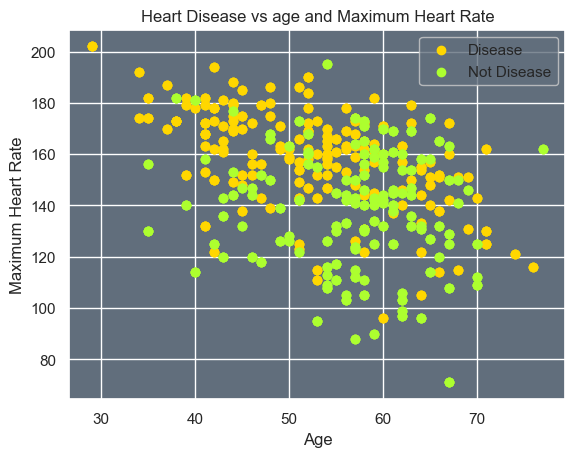

In [137]:
# create a scatter plot for heart diseases vs age and maximum heart rate
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='#FFD700',label='Disease')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='#ADFF2F',label='Not Disease')
# add a legend 
plt.legend()
#add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# set the title
plt.title('Heart Disease vs age and Maximum Heart Rate')
#shw plot
plt.show()


In [138]:
# create logistic regression
#help to solve problems with classification
#create dependent and independent variables
y=df.target.values
x_data=df.drop(['target'],axis=1)

In [139]:
#normalise the data
x=(x_data -np.min(x_data)) /(np.max(x_data))-np.min(x_data)

In [140]:
# split the data 80 training and 20% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state=0)


In [141]:
#transpose matrices
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T


In [142]:
#determine the accuracy us ing the Logistic regression
#getting the test accuracy
from sklearn.linear_model import LogisticRegression


# Assuming you have already defined x_train, y_train, x_test, and y_test

# Determine the accuracy using logistic regression
# Getting the test accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100

accuracies['LogisticRegression'] = acc
# Get output
print('Test accuracy: {:.2f}%'.format(acc))



Test accuracy: 86.34%


In [143]:
#first import the K-Nearnest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)  # n neighbors mean for kNN
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

# Get output display
print("{} NN score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T) * 100))


2 NN score: 95.12%


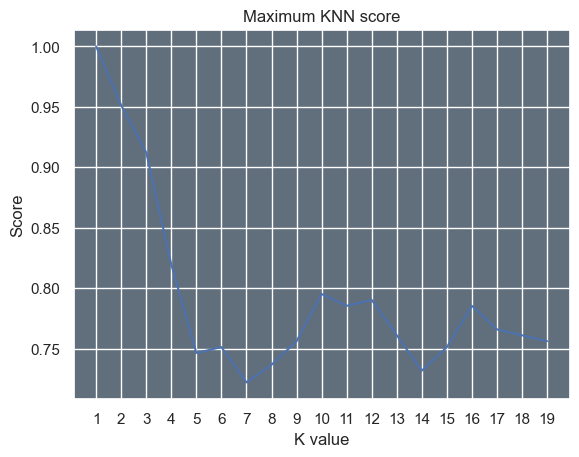

Maximum KNN score is 100.00


In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Getting the maximum KNN score
score_list = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)  # Get n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

# Show using linear plot
plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximum KNN score')
plt.show()

# Get maximum kNN score for the model in percentage
acc = max(score_list) * 100
accuracies['KNN'] = acc
print('Maximum KNN score is {:.2f}'.format(acc))


In [145]:
# get the test accuracy using the the support vector  algorithm
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train.T, y_train.T)
acc=svm.score(x_train.T, y_train.T)*100
accuracies['SVC']=acc
print('Test Accuracy of SVC:{:.2f}'.format(acc))

Test Accuracy of SVC:70.24


In [146]:
from sklearn.naive_bayes import GaussianNB

# Get accuracy using Naive Bayes algorithm
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
acc = nb.score(x_test.T, y_test.T) * 100
accuracies['naive bayes'] = acc

# Display the accuracy
print('Naive Bayes accuracy: {:.2f}'.format(acc))


Naive Bayes accuracy: 85.37


In [147]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
acc = dtc.score(x_test.T, y_test.T) * 100
accuracies['Decision Tree'] = acc

# Display the decision tree test accuracy
print('Decision tree test accuracy: {:.2f}%'.format(acc))


Decision tree test accuracy: 100.00%


In [148]:
#get accuracy of the random forest classification algorithm
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train.T, y_train.T)
acc = rf.score(x_test.T, y_test.T) * 100
accuracies['Random forest'] = acc

# Display the Random Forest algorithm Accuracy score
print('Random Forest algorithm Accuracy score: {:.2f}%'.format(acc))




Random Forest algorithm Accuracy score: 100.00%


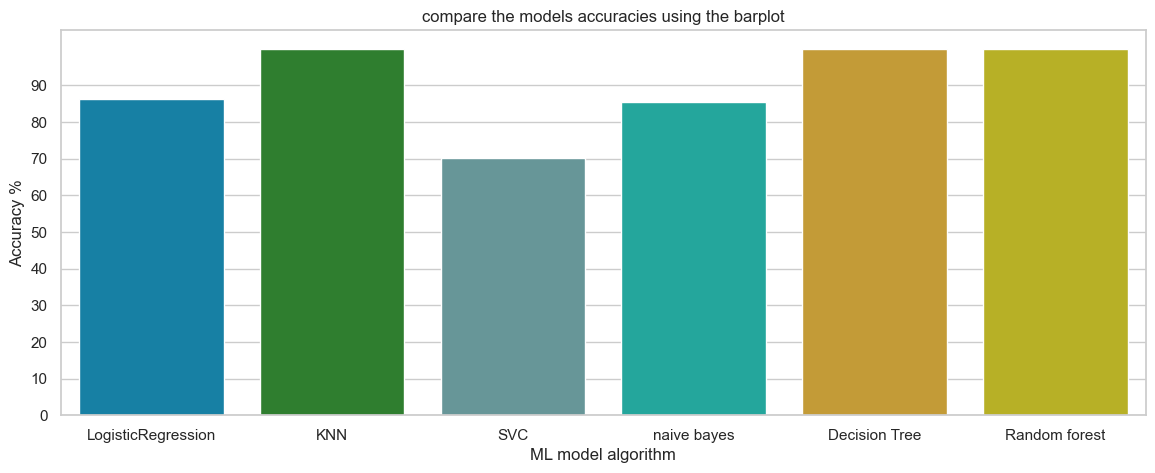

In [155]:
# compare the models accuracies using the barplot from sns 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming that the `accuracies` dictionary is already defined

# Define the color palette
colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E']

# Set the style and size of the plot
sns.set_style('whitegrid')
plt.figure(figsize=(14, 5))

# Set y-axis ticks
plt.yticks(np.arange(0, 100, 10))

# Set axis labels
plt.title('compare the models accuracies using the barplot')
plt.ylabel('Accuracy %')
plt.xlabel('ML model algorithm')

# Create the bar plot
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

# Show the plot
plt.show()


In [150]:
#ml confusion matrix
#evaluate the performance of the classification model
#true positive (TP)
#true negative (TN)
#false positive (FP)
#fals negative(FN)
#ROC(receiver operating charateristic)and AUC(area under the curve)


In [151]:
#get confusion matrix to look for the inbalanced dataset
#predicted values
y_head_lr=lr.predict(x_test.T)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T,y_train.T)
y_head_knn=knn3.predict(x_test.T)
y_head_svm=svm.predict(x_test.T)
y_head_nb=nb.predict(x_test.T)
y_head_dtc=dtc.predict(x_test.T)
y_head_rf=rf.predict(x_test.T)


In [152]:
#import module for confusion matrix 
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn= confusion_matrix(y_test,y_head_knn)
cm_svm= confusion_matrix(y_test,y_head_svm)
cm_nb=confusion_matrix(y_test,y_head_nb)
cm_rf=confusion_matrix(y_test,y_head_rf)
cm_dtc=confusion_matrix(y_test,y_head_dtc)


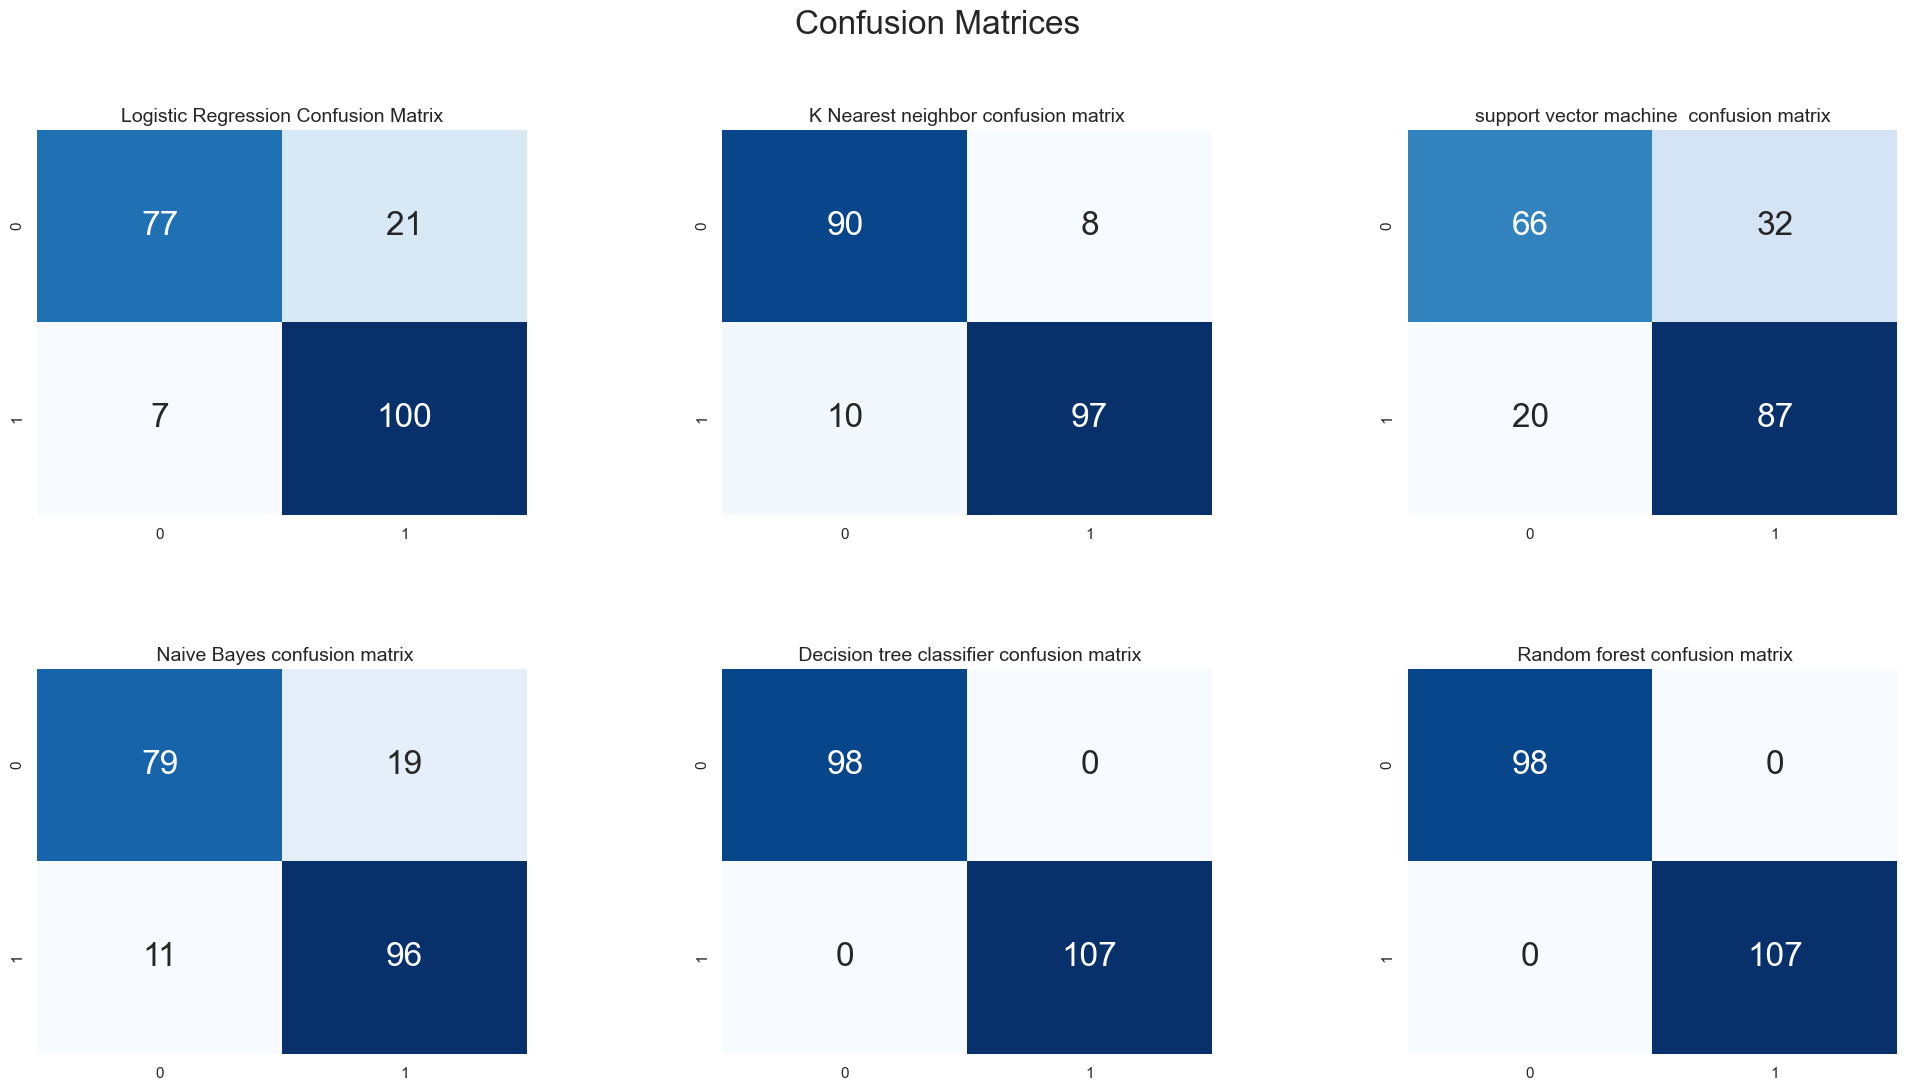

In [153]:
plt.figure(figsize=(24, 12))
plt.suptitle('Confusion Matrices', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#heatmap forLogistic Regression Confusion Matrix
# Logistic Regression Confusion Matrix using heatmap
plt.subplot(2, 3, 1)
plt.title('Logistic Regression Confusion Matrix', fontsize=14)  # Increase the fontsize
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt='d', cbar=False, annot_kws={'size': 24})  # Fix annot_kws

# Add other subplots for other confusion matrices (if needed)

#heatmap for K Nearest neighbor confusion matrix'
plt.subplot(2, 3, 2)
plt.title('K Nearest neighbor confusion matrix', fontsize=14)  # Increase the fontsize
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt='d', cbar=False, annot_kws={'size': 24})  # Fix annot_kws

#heatmap for support vector machine  confusion matrix'
plt.subplot(2, 3, 3)
plt.title('support vector machine  confusion matrix', fontsize=14)  # Increase the fontsize
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt='d', cbar=False, annot_kws={'size': 24})  # Fix annot_kws

#heatmap for Naive Bayes confusion matrix''
plt.subplot(2, 3, 4)
plt.title(' Naive Bayes confusion matrix', fontsize=14)  # Increase the fontsize
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt='d', cbar=False, annot_kws={'size': 24})  # Fix annot_kws


#heatmap for 'Decision tree classifier confusion matrix'
plt.subplot(2, 3, 5)
plt.title(' Decision tree classifier confusion matrix', fontsize=14)  # Increase the fontsize
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt='d', cbar=False, annot_kws={'size': 24})  # Fix annot_kws



#heatmap for random forest confusion matrix''
plt.subplot(2, 3, 6)
plt.title(' Random forest confusion matrix', fontsize=14)  # Increase the fontsize
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt='d', cbar=False, annot_kws={'size': 24})  # Fix annot_kws

# Show the plot
plt.show()


In [154]:
#the confusion matrix allows us to understand how well the model id performing and identify specific areasof improvement especially when its comes to dealing with inbalanced datasets or when differe types of error heave different costs or consequences

